In [5]:
source('../../source/basic.r')

source('../validataion.r')


Warning message:
“no function found corresponding to methods exports from ‘BSgenome’ for: ‘releaseName’”


In [6]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(Signac)
    library(Seurat)
    library(GenomeInfoDb)
    library(EnsDb.Hsapiens.v86 )# hg38
   # library(EnsDb.Hsapiens.v75) #hg19
    library(ggplot2)
    library(patchwork)
    library(data.table)
    library(Matrix)
    set.seed(1234)
})

# cpeak data

## read data

In [7]:
sample_name='3E5CFL'

In [8]:
dir_mtx = list.files('data/',pattern = 'gz.mtx')%>%.[grep(sample_name,.)]

In [9]:
frag_dir = list.files('data/',pattern = 'gz$')%>%.[grep(sample_name,.)]

In [11]:
counts <- readMM(paste0("data/",dir_mtx)) 


In [12]:
counts%>%dim

[1] 1568814    9670

In [13]:
colnames(counts) <- fread(paste0('data/barcode/',sample_name,'.barcode'),header = FALSE)%>%
                    pull(V1)

rownames(counts) <- fread('data/cpeak.bed')%>%mutate(name=paste0(V1,':',V2,'-',V3))%>%pull(name)

In [14]:
counts[1:3,1:3]

3 x 3 sparse Matrix of class "dgTMatrix"
                 GGAGTAGAGTGCTGAG-1 TTGCCCAAGTCTCGAT-1 AACAGTCGTACCCACG-1
chr1:9919-10727                   .                  .                  .
chr1:11043-11422                  .                  .                  .
chr1:13249-13832                  .                  .                  .

In [15]:
metadata <- fread('data/tumor_metadata_Full_Cohort.tsv')

In [16]:
metadata%>%dim

[1] 74621    20

In [17]:
colnames(metadata)

[1] "Barcode"              "Sample"               "TSSEnrichment"       
 [4] "ReadsInTSS"           "ReadsInPromoter"      "ReadsInBlacklist"    
 [7] "PromoterRatio"        "PassQC"               "NucleosomeRatio"     
[10] "nMultiFrags"          "nMonoFrags"           "nFrags"              
[13] "nDiFrags"             "DoubletScore"         "DoubletEnrichment"   
[16] "BlacklistRatio"       "ATAC_clusters"        "predictedCell_ArchR" 
[19] "predictedGroup_ArchR" "predictedScore_ArchR"

In [18]:
metadata$Sample%>%unique

[1] "3533EL" "3571DL" "36186L" "36639L" "366C5L" "37EACL" "38FE7L" "3BAE2L"
 [9] "3CCF1L" "3E4D1L" "3E5CFL"

In [19]:
metadata = metadata%>%dplyr::filter(Sample==sample_name)%>%
        mutate(Barcode=str_extract(Barcode,'(?<=#).*'))%>%
        column_to_rownames('Barcode')

In [20]:
metadata%>%colnames

[1] "Sample"               "TSSEnrichment"        "ReadsInTSS"          
 [4] "ReadsInPromoter"      "ReadsInBlacklist"     "PromoterRatio"       
 [7] "PassQC"               "NucleosomeRatio"      "nMultiFrags"         
[10] "nMonoFrags"           "nFrags"               "nDiFrags"            
[13] "DoubletScore"         "DoubletEnrichment"    "BlacklistRatio"      
[16] "ATAC_clusters"        "predictedCell_ArchR"  "predictedGroup_ArchR"
[19] "predictedScore_ArchR"

In [21]:
metadata%>%head

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,nFrags,nDiFrags,DoubletScore,DoubletEnrichment,BlacklistRatio,ATAC_clusters,predictedCell_ArchR,predictedGroup_ArchR,predictedScore_ArchR
,<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
GGAGTAGAGTGCTGAG-1,3E5CFL,5.050,13169,18972,881,0.09923528,1,3.036953,16463,23679,95591,55449,0,0.3832596,0.004608174,C34,CCTCACACAGTGTGGA-1_11,9-Epithelial cell,1
TTGCCCAAGTCTCGAT-1,3E5CFL,5.151,12841,18072,966,0.09505475,1,1.959742,14170,32118,95061,48773,0,0.2763034,0.005080948,C34,CATCAAGGTATGGTTC-1_11,9-Epithelial cell,1
AACAGTCGTACCCACG-1,3E5CFL,6.904,18179,22547,869,0.11924582,1,1.521672,9229,37491,94540,47820,0,0.1648907,0.004595938,C34,AGTCTCCCAGAATTCC-1_11,9-Epithelial cell,1
GCTGTTCAGTCCTTCC-1,3E5CFL,7.185,17334,21165,838,0.11358757,1,1.447936,10703,38059,93166,44404,0,0.3788031,0.004497349,C34,TCGTGGGCATGTGTCA-1_11,9-Epithelial cell,1
AGCTATGTCAACGTGT-1,3E5CFL,7.635,17967,20880,860,0.11380979,1,1.619044,10678,35025,91732,46029,0,0.2763034,0.004687568,C34,CGTGATATCTGGCCAG-1_11,9-Epithelial cell,1
ATAGTCGTCTCTCAAT-1,3E5CFL,7.226,18676,21955,1053,0.11995039,1,1.870581,13444,31881,91517,46192,0,0.2005428,0.005753029,C34,GTGACGCCAAGAAATC-1_11,9-Epithelial cell,1


### subset using metadata

In [22]:
counts.sub <- counts[,intersect(rownames(metadata),colnames(counts))]

In [23]:
metadata.sub <- metadata[intersect(rownames(metadata),colnames(counts)),]

## build seurat object

In [26]:
chrom_assay <- CreateChromatinAssay(
  counts = counts.sub,
  sep = c(":", "-"),
  genome = 'hg38',
  fragments = paste0('./data/',frag_dir),
  min.cells = 0,
  min.features = 0
)


Warning message in CreateChromatinAssay(counts = counts.sub, sep = c(":", "-"), :
"Overlapping ranges supplied. Ranges should be non-overlapping."
Computing hash



In [27]:
seurat.object.all <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  meta.data = metadata.sub
)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [28]:
seurat.object.all

An object of class Seurat 
1568814 features across 9670 samples within 1 assay 
Active assay: peaks (1568814 features, 0 variable features)

In [29]:
seurat.object <- subset(seurat.object.all, cells = rownames(metadata.sub))

In [30]:
seurat.object

An object of class Seurat 
1568814 features across 9670 samples within 1 assay 
Active assay: peaks (1568814 features, 0 variable features)

In [31]:
seurat.object <- RunTFIDF(seurat.object)
seurat.object <- FindTopFeatures(seurat.object, min.cutoff = 'q0')
seurat.object <- RunSVD(seurat.object)

Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
"Some features contain 0 total counts"
Running SVD

Scaling cell embeddings



In [32]:
psize(4,4)

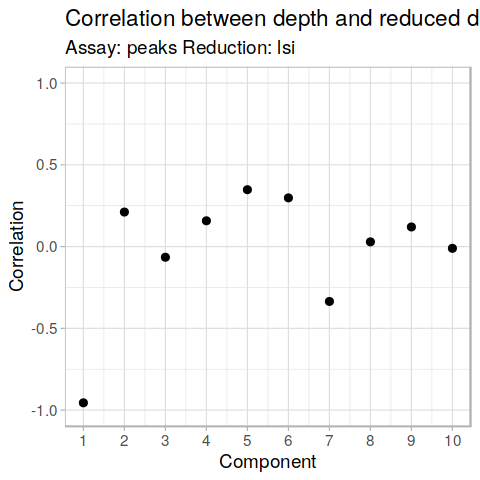

In [33]:
DepthCor(seurat.object)

In [34]:
suppressMessages({
    
    seurat.object <- RunUMAP(object = seurat.object, reduction = 'lsi', dims = 2:30)
    seurat.object <- FindNeighbors(object = seurat.object, reduction = 'lsi', dims = 2:30)
    seurat.object <- FindClusters(object = seurat.object, verbose = FALSE, algorithm = 3)
    # p.umap.cluster = DimPlot(object = seurat.object, label = TRUE) + NoLegend()
    
})


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"


In [35]:
p.umap.cluster = DimPlot(object = seurat.object, label = TRUE) + NoLegend()

In [36]:
psize()

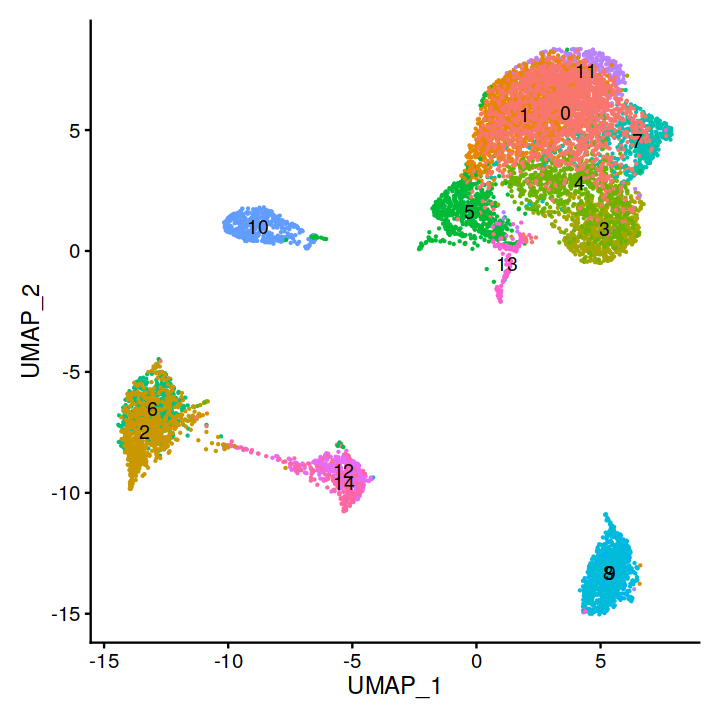

In [37]:
p.umap.cluster

In [38]:
cells.sub <- metadata.sub%>%rownames_to_column('cell')%>%group_by(predictedGroup_ArchR)%>%
            mutate(n=n())%>%ungroup%>% dplyr::filter(n>100)%>%pull(cell)

In [39]:
p.umap.label = DimPlot(object = seurat.object,cells = cells.sub, group.by='predictedGroup_ArchR',label = TRUE) + NoLegend()

In [40]:
psize(6,6)

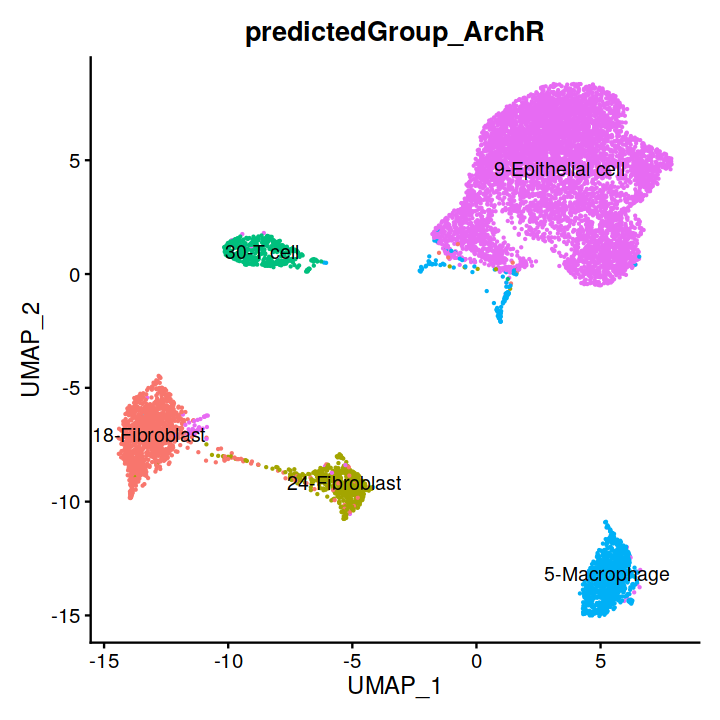

In [41]:
p.umap.label #+ scale_color_manual(values = rep(colors_,2))

In [42]:
metadata.sub%>%pull(predictedGroup_ArchR)%>%unique

[1] "9-Epithelial cell" "18-Fibroblast"     "24-Fibroblast"    
[4] "2-T cell"          "30-T cell"         "5-Macrophage"     
[7] "4-Lymphocytes"     "13-Macrophages"    "6-Fibroblast"

## RNA

In [43]:
metadata.rna <- fread('data/tumor_metadata_Full_Cohort_mmc3.tsv')#%>%dplyr::filter(CNV.Pos==TRUE)

In [44]:
metadata.all <- metadata%>%rownames_to_column('ID')%>%
                left_join(metadata.rna,by=c('predictedCell_ArchR'='Barcode'))%>%column_to_rownames('ID')

In [45]:
seurat.object@meta.data <-cbind(seurat.object@meta.data,total.cnv=metadata.all$Total_CNVs)

seurat.object@meta.data <-cbind(seurat.object@meta.data,cnv=metadata.all$CNV.Pos)

In [46]:

p.umap.cnv = FeaturePlot(object = seurat.object,features='total.cnv',label = FALSE) #+ NoLegend()

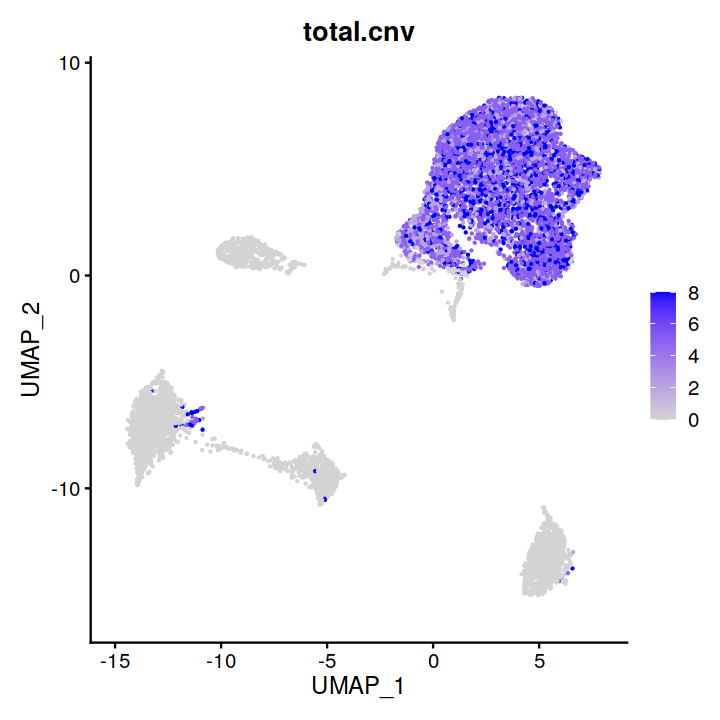

In [47]:
p.umap.cnv

# RNA

In [63]:
dir_mtx = list.files('data/rna/',pattern = 'mtx.gz')%>%.[grep(sample_name,.)]

dir_barcode = list.files('data/rna/',pattern = 'barcodes')%>%.[grep(sample_name,.)]

dir_feature = list.files('data/rna/',pattern = 'features')%>%.[grep(sample_name,.)]

In [64]:
counts <- readMM(paste0("data/rna/",dir_mtx)) 

In [65]:
counts%>%dim

[1] 33538  6939

In [66]:
colnames(counts) <- read_table(paste0("data/rna/",dir_barcode),col_names  = FALSE,col_types = cols())%>%
                    pull(X1)

rownames(counts) <- read_table(paste0("data/rna/",dir_feature),col_names  = FALSE,col_types = cols())%>%mutate(name=paste0(X1,':',X2,'-',X3))%>%pull(name)

In [67]:
seurat.rna <- CreateSeuratObject(counts = counts, project = "tumor", min.cells = 3, min.features = 200)

In [68]:
seurat.rna

An object of class Seurat 
21125 features across 6875 samples within 1 assay 
Active assay: RNA (21125 features, 0 variable features)

In [171]:
colnames(counts)%>%head

[1] "AAACCCAAGACCAAAT-1" "AAACCCAAGTATGAGT-1" "AAACCCAAGTCAATCC-1"
[4] "AAACCCACAACCAACT-1" "AAACCCACAAGACAAT-1" "AAACCCAGTCTTGAGT-1"

In [173]:
metadata.rna.sub <- metadata.rna%>%dplyr::filter(Sample==sample_name)%>%
                    mutate(Barcode=gsub('_.$|_..$','',Barcode))%>%column_to_rownames('Barcode')

In [175]:
metadata.rna.sub%>%dim

[1] 7454   11

In [135]:
counts[1:3,1:3]

In [176]:
seurat.rna <- subset(seurat.rna, cells = rownames(metadata.rna.sub))

In [177]:
seurat.rna

An object of class Seurat 
22007 features across 7454 samples within 1 assay 
Active assay: RNA (22007 features, 0 variable features)

In [178]:
seurat.rna <- NormalizeData(seurat.rna, normalization.method = "LogNormalize", scale.factor = 10000)

In [179]:
seurat.rna <- FindVariableFeatures(seurat.rna, selection.method = "vst", nfeatures = 2000)

In [180]:
all.genes <- rownames(seurat.rna)
seurat.rna <- ScaleData(seurat.rna, features = all.genes)

Centering and scaling data matrix



## gene activity

In [ ]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86 )


In [59]:

# # # change to UCSC style since the data was mapped to hg19
# seqlevelsStyle(annotations) <- 'UCSC'

In [60]:
DefaultAssay(seurat.object) <- "peaks"

In [61]:
# add the gene information to the object
Annotation(seurat.object) <- annotations

In [62]:
annotations%>%filter(seqnames%in%)

GRanges object with 3021151 ranges and 5 metadata columns:
                  seqnames        ranges strand |           tx_id   gene_name
                     <Rle>     <IRanges>  <Rle> |     <character> <character>
  ENSE00001489430        X 276322-276394      + | ENST00000399012      PLCXD1
  ENSE00001536003        X 276324-276394      + | ENST00000484611      PLCXD1
  ENSE00002160563        X 276353-276394      + | ENST00000430923      PLCXD1
  ENSE00001750899        X 281055-281121      + | ENST00000445062      PLCXD1
  ENSE00001489388        X 281192-281684      + | ENST00000381657      PLCXD1
              ...      ...           ...    ... .             ...         ...
  ENST00000361739       MT     7586-8269      + | ENST00000361739      MT-CO2
  ENST00000361789       MT   14747-15887      + | ENST00000361789      MT-CYB
  ENST00000361851       MT     8366-8572      + | ENST00000361851     MT-ATP8
  ENST00000361899       MT     8527-9207      + | ENST00000361899     MT-ATP6
  ENS

In [ ]:
gene.activities <- GeneActivity(seurat.object)

In [ ]:
# add the gene activity matrix to the Seurat object as a new assay and normalize it
seurat.object[['RNA']] <- CreateAssayObject(counts = gene.activities)
seurat.object <- NormalizeData(
  object = seurat.object,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(seurat.object$nCount_RNA)
)

# save 

In [179]:
seurat.objct.list <- list(peaks=seurat.object, cpeaks=seurat.object.cpeak)

In [180]:
qsave(seurat.objct.list,'rds/fw8.seurat.objct.list.qs')

In [181]:
psize(6,6)

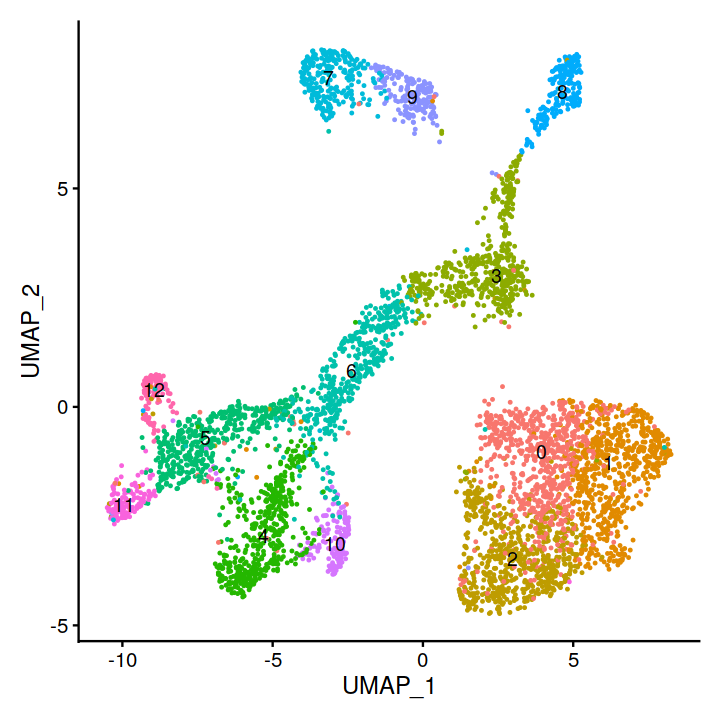

In [182]:
p.umap.cluster+theme(aspect.ratio = 1) 

In [183]:
ggsave(paste0('plot/fw8.peak.umpa.cluster.pdf'),height = 6,width = 6)

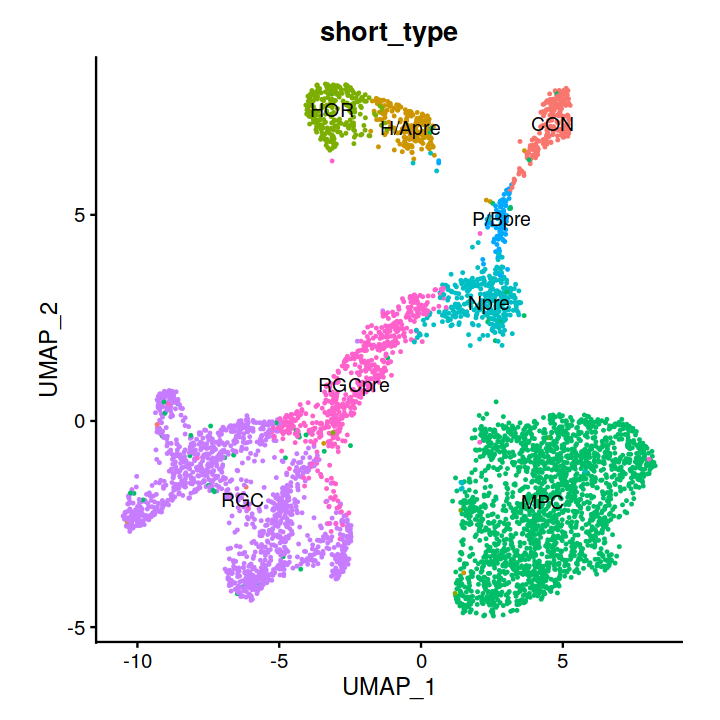

In [184]:
p.umap.label+theme(aspect.ratio = 1) 

In [185]:
ggsave(paste0('plot/fw8.peak.umpa.label.pdf'),height = 6,width = 6)

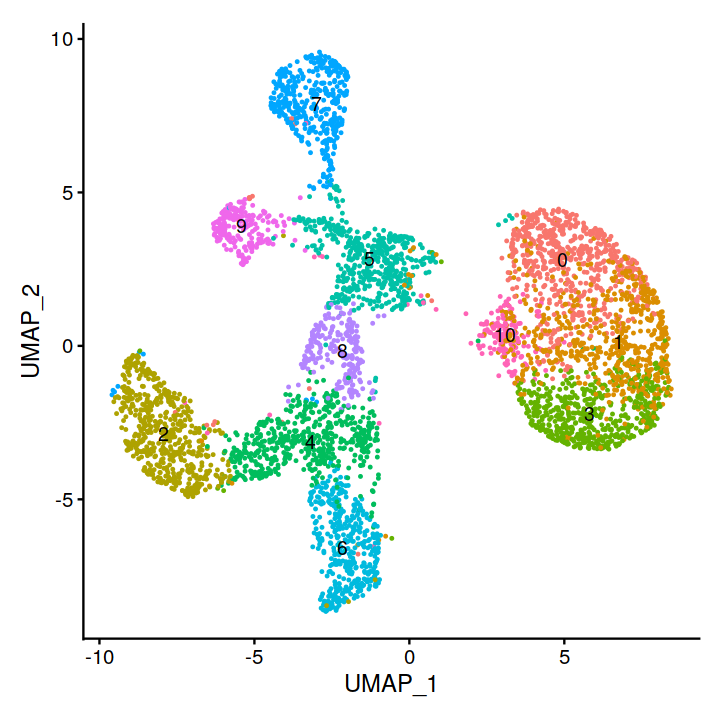

In [186]:
p.umap.cluster.cpeak+theme(aspect.ratio = 1) 

In [187]:
ggsave(paste0('plot/fw8.cpeak.umpa.cluster.pdf'),height = 6,width = 6)

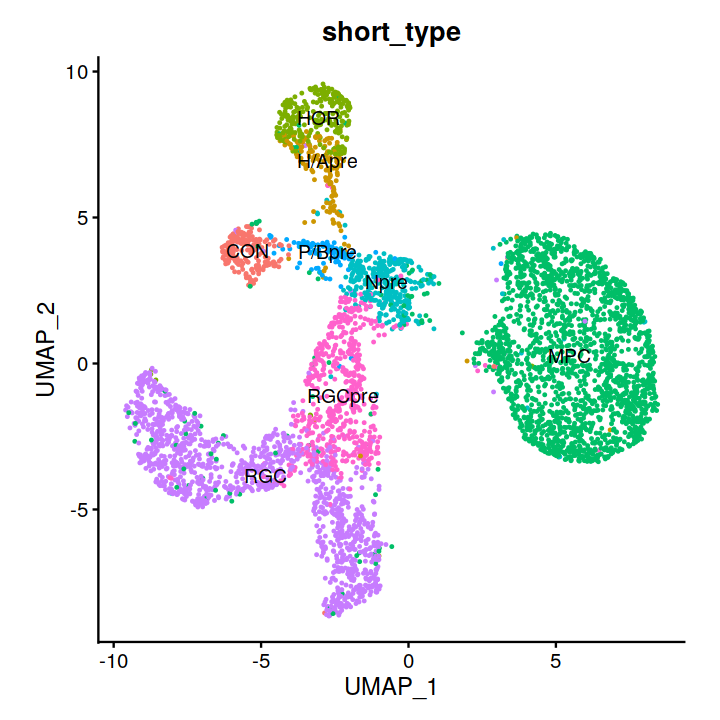

In [188]:
p.umap.label.cpeak+theme(aspect.ratio = 1) 

In [189]:
ggsave(paste0('plot/fw8.cpeak.umpa.label.pdf'),height = 6,width = 6)